# The Problem

The goal is to create a model to predict whether a person has heart disease based on correlated health variables. This problem is a binary classification problem with the target variable being Heart_Disease in the dataset. Models are being built to find patterns in the data in order to predict whether a patient has heart disease

# Chosen models

There are three model types being created: a logistic regression model, a random forest model, and a support vector machine model. These three models were chosen due to their compatibility with binary classification problems.

# Setup

## Libraries

In [2]:
# Importing basic libraries used

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [3]:
# Importing cleaned dataset

df = pd.read_csv('C:/Users/Abbae/Documents/School/Masters Degree/FALL 2023/CVD/CVD_cleaned.csv', on_bad_lines='skip')

In [4]:
# Renaming Height and Weight variables for easier processing/analysis

df.rename({'Height_(cm)': 'Height', 'Weight_(kg)': 'Weight'}, axis=1, inplace=True)

## Missing Values

In [5]:
# Determining if there are any null/missing values that need to be addressed

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height                          0
Weight                          0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

There are no missing values in dataset.

## Outliers/Summary Statistics

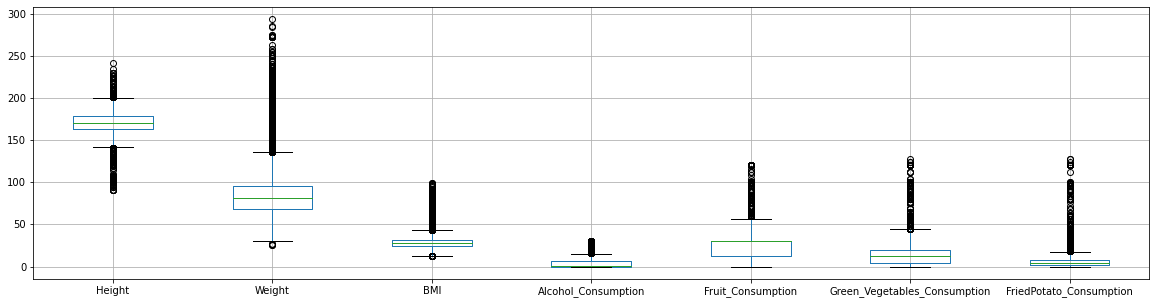

In [6]:
# Visualizing overall values of the numerical variables in the dataset

plt.figure(figsize = (20,5))
df.boxplot()
plt.show()

In [7]:
# Providing summary statistics of the numerical variables in the dataset

df.describe()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Height:
* The range for height is 91-241cm. This may contain outliers, as 241 cm is ~ 8 feet tall.

Weight:
* The range for weight is 24.95-293kg. This may contain outliers, as 293 kg is ~ 536 lbs.

BMI:
* the range for BMI is 12.02-99.33. A BMI of 99.33 is extremely high and may be an outlier or error.

Alcohol Consumption:
* The range for alcohol consumption is 0-30. 

Fruit Consumption:
* The range for fruit consumption is 0-120. 

Green Vegetable Consumption:
* The range for green vegetable consumption is 0-128.

Fried Potato Consumption:
* The range for fried potato consumption is 0-128.

## Duplicates

In [8]:
# Determining the number of duplicate data points in the dataset

df.duplicated().sum()

80

There are 80 duplicates in the dataset. These duplicates will be removed from the dataset.

In [9]:
# Removing duplicates from the dataset

df = df.drop_duplicates()

## Data Preparation

In [29]:
# Importing library for data preparation

from sklearn.preprocessing import OrdinalEncoder

### Encoding Yes/No Variables

In [10]:
# Encoding Yes/No variables to binary: 
# Yes values were encoded with a value of 1
# No values were encoded with a value of 2

encode = OrdinalEncoder()

df['Exercise'] = encode.fit_transform(df[['Exercise']])
df['Heart_Disease'] = encode.fit_transform(df[['Heart_Disease']])
df['Skin_Cancer'] = encode.fit_transform(df[['Skin_Cancer']])
df['Other_Cancer'] = encode.fit_transform(df[['Other_Cancer']])
df['Depression'] = encode.fit_transform(df[['Depression']])
df['Sex'] = encode.fit_transform(df[['Sex']])
df['Arthritis'] = encode.fit_transform(df[['Arthritis']])
df['Smoking_History'] = encode.fit_transform(df[['Smoking_History']])

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


### General Health Variable Encoding

In [11]:
# Encoding levels for the General Health Variable: 
# Poor values were encoded with a value of 0
# Fair values were encoded with a value of 1
# Good values were encoded with a value of 2
# Very Good values were encoded with a value of 3
# Excellent values were encoded with a value of 4

gh_levels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
gh_encode = OrdinalEncoder(categories = [gh_levels])

df['General_Health'] = gh_encode.fit_transform(df[['General_Health']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


### Checkup Variable Encoding

In [12]:
# Encoding levels for the Checkup Variable:
# Within the past year values were encoded with a value of 0
# Within the past 2 years values were encoded with a value of 1
# Within the past 5 years values were encoded with a value of 2
# 5 or more years ago values were encoded with a value of 3
# Never values were encoded with a value of 4

ch_levels = ['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']
ch_encode = OrdinalEncoder(categories = [ch_levels])

df['Checkup'] = ch_encode.fit_transform(df[['Checkup']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


### Diabetes Variable Encoding

In [13]:
# Encoding levels for the Diabetes Variable:
# No values were encoded with a value of 0
# No, pre-diabetes or borderline diabetes values were encoded with a value of 1
# Yes, but female told only during pregnancy values were encoded with a value of 2
# Yes values were encoded with a value of 3

d_levels = ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy', 'Yes']
d_encode = OrdinalEncoder(categories = [d_levels])

df['Diabetes'] = d_encode.fit_transform(df[['Diabetes']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


### Age

In [14]:
# Narrowing age variables to be represented by lowest age in bracket

df['Age_Category'].replace({'18-24': '18'}, inplace = True)
df['Age_Category'].replace({'25-29': '25'}, inplace = True)
df['Age_Category'].replace({'30-34': '30'}, inplace = True)
df['Age_Category'].replace({'35-39': '35'}, inplace = True)
df['Age_Category'].replace({'40-44': '40'}, inplace = True)
df['Age_Category'].replace({'45-49': '45'}, inplace = True)
df['Age_Category'].replace({'50-54': '50'}, inplace = True)
df['Age_Category'].replace({'55-59': '55'}, inplace = True)
df['Age_Category'].replace({'60-64': '60'}, inplace = True)
df['Age_Category'].replace({'65-69': '65'}, inplace = True)
df['Age_Category'].replace({'70-74': '70'}, inplace = True)
df['Age_Category'].replace({'75-79': '75'}, inplace = True)
df['Age_Category'].replace({'80+': '80'}, inplace = True)

In [15]:
# Changing Age_Category variable to be of type int

df['Age_Category'] = df['Age_Category'].astype(int)

In [16]:
# Confirming variables are all the desired data type

df.dtypes

General_Health                  float64
Checkup                         float64
Exercise                        float64
Heart_Disease                   float64
Skin_Cancer                     float64
Other_Cancer                    float64
Depression                      float64
Diabetes                        float64
Arthritis                       float64
Sex                             float64
Age_Category                      int32
Height                          float64
Weight                          float64
BMI                             float64
Smoking_History                 float64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [ ]:
# Once all variables have been encoded and converted to the necessary type, it is time to build the models.

# Build Model

## Define X and y

In [17]:
# Defining the target variable as y
# Defining feature variables as X

y = df['Heart_Disease']
X = df.drop(['Heart_Disease'], axis = 1)

## Oversampling

In [30]:
# This dataset is imbalanced and will make identifying instances of heart disease more difficult. To combat this, oversampling techniques are utilized. Oversampling is used to increase the amount of cases where the target variable is 1.
#The oversampling technique used is Synthetic Minority Over-sampling Technique (SMOTE), which creates synthetic samples for the minority class using interpolation.

from imblearn.over_sampling import SMOTE

In [18]:
# Oversampling the dataset

sm=SMOTE(sampling_strategy = 'minority', random_state = 42)
X,y=sm.fit_resample(X,y)
y.value_counts()

0.0    283803
1.0    283803
Name: Heart_Disease, dtype: int64

## Scale Data

In [31]:
#Importing library to scale dataset

from sklearn.preprocessing import MinMaxScaler

In [19]:
# Scaling the dataset

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
X.shape

(567606, 18)

## Split into train and test set

In [32]:
# Importing library to split original dataset into training and testing datasets

from sklearn.model_selection import train_test_split

In [20]:
# Splitting the original dataset into training and testing datasets

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
# Once all preprocessing is complete and the data is split into a training and test set, it is time to build and train the models. 
# The first model will be Logistic Regression, followed by Random Forest and SVM:C models.

## Logistic Regression

In [34]:
# Importing the LogisticRegression library

from sklearn.linear_model import LogisticRegression

In [40]:
# Building/Training the initial Logistic Regression Model 

lr = LogisticRegression(random_state = 42, max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [35]:
# Importing libraries for evaluating model performance

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

Test Accuracy Logistic Regression : 77.46075650534698
Train Accuracy Logistic Regression : 77.31366883660293
Classification Report :
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.77     56761
         1.0       0.76      0.81      0.78     56761

    accuracy                           0.77    113522
   macro avg       0.78      0.77      0.77    113522
weighted avg       0.78      0.77      0.77    113522

Testing Accuracy for Logistic Regression: 77.46075650534698
Testing Sensitivity for Logistic Regression: 80.77729426895228


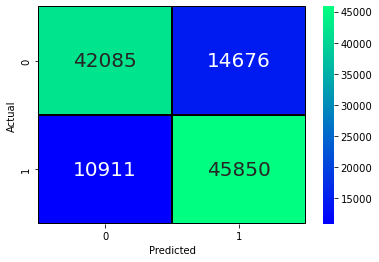

In [88]:
# Evaluating performance of the initial trained model by predicting the target variable and creating the confusion matrix

predictions = lr.predict(X_test)
print("Test Accuracy Logistic Regression :",accuracy_score(y_test, predictions)*100)

train_predictions = lr.predict(X_train)
print("Train Accuracy Logistic Regression :",accuracy_score(y_train, train_predictions)*100)

print("Classification Report :\n",classification_report(y_test, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Logistic Regression:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Logistic Regression:', (TP)/(TP + FN)*100)

Logistic Regression ROC AUC Score : 77.46075650534698


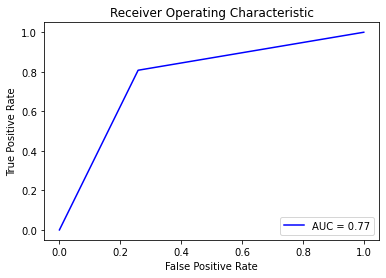

In [43]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Logistic Regression ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The initial Logistic Regression model after training has a testing accuracy of 77.46%, a model precision of 0.76 for class 1, and a sensitivity of 80.78%. The ROC AUC score for this model was 77.46. 
# There were 14,676 false positives (predicted to be 1 while actually 0) and 10,911 false negatives (predicted to be 0 while actually one).

# The next step is to conduct a grid search to find the optimum combination of model parameters to maximize the precision of this model.

In [28]:
# Importing library to conduct grid search

from sklearn.model_selection import GridSearchCV

In [54]:
# Grid Search to find optimum model parameters

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [0.0001, 0.001, 0.01, 0.1]

}

# Create the GridSearchCV object
grid = GridSearchCV(lr, param_grid, scoring = 'precision', n_jobs = -1, cv = 10, verbose = 1)

# Fit the grid search to your data
grid.fit(X_train, y_train)

# Print the best parameters after tuning
print("Best Parameters:", grid.best_params_)

# Use the best estimator to make predictions
grid_predictions = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, grid_predictions))


Fitting 10 folds for each of 140 candidates, totalling 1400 fits
Best Parameters: {'C': 1, 'solver': 'sag', 'tol': 0.1}
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76     56761
         1.0       0.75      0.82      0.78     56761

    accuracy                           0.77    113522
   macro avg       0.78      0.77      0.77    113522
weighted avg       0.78      0.77      0.77    113522



In [ ]:
# After completion of the grid search, the optimum parameters for the model were found. 
# These parameters are then used to created an optimized Logistic Regression model, which is then fitted using the training data.

In [66]:
# Building and training an optimized Logistic Regression Model using the optimum parameters determined from the grid search

lr_best = LogisticRegression(random_state = 42, max_iter = 10000, solver = 'sag', C = 1, tol = 0.1)
lr_best.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=42, solver='sag', tol=0.1)

Test Accuracy Logistic Regression : 77.48894487412132
Train Accuracy Logistic Regression : 77.40307960641644
Classification Report :
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76     56761
         1.0       0.75      0.82      0.78     56761

    accuracy                           0.77    113522
   macro avg       0.78      0.77      0.77    113522
weighted avg       0.78      0.77      0.77    113522

Testing Accuracy for Logistic Regression: 77.48894487412132
Testing Sensitivity for Logistic Regression: 81.81145504836067


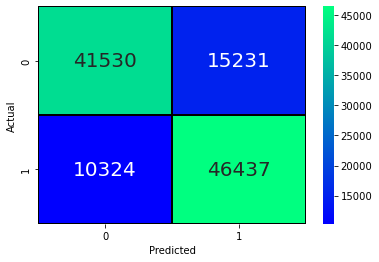

In [87]:
# Evaluating performance of the optimized trained model by predicting the target variable and creating the confusion matrix

predictions = lr_best.predict(X_test)
print("Test Accuracy Logistic Regression :",accuracy_score(y_test, predictions)*100)

train_predictions = lr_best.predict(X_train)
print("Train Accuracy Logistic Regression :",accuracy_score(y_train, train_predictions)*100)

print("Classification Report :\n",classification_report(y_test, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Logistic Regression:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Logistic Regression:', (TP)/(TP + FN)*100)


Logistic Regression ROC AUC Score : 77.48894487412132


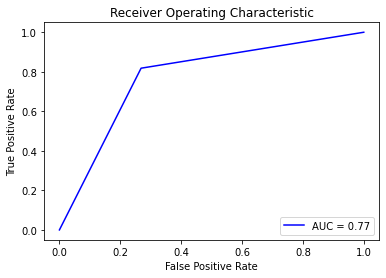

In [71]:
# Calculating the ROC AUC Score and creating the ROC Curve
 
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Logistic Regression ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The optimized Logistic Regression model after training has a testing accuracy of 77.49% (0.03% increase), a model precision of 0.75 for class 1 (0.01 decrease), and a sensitivity of 81.81% (0.03% increase). The ROC AUC score for this model was 77.49 (0.03 increase). 
# There were 15,231 false positives (555 increase) and 10,324 false negatives (587 decrease).

# Although the precision dropped slightly, the overall performance of the optimized Logistic Regression model is slightly better than that of the original model.

# The next step is to build and train and initial Random Forest Model and fit using the training data.

## Random Forest

In [ ]:
# Importing the RandomForestClassifier library

from sklearn.ensemble import RandomForestClassifier

In [21]:
# Building/Training the initial Random Forest Classifier Model

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy Random Forest : 95.63344549955075
Train Accuracy Random Forest : 99.99691687000643
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     56761
         1.0       0.99      0.92      0.95     56761

    accuracy                           0.96    113522
   macro avg       0.96      0.96      0.96    113522
weighted avg       0.96      0.96      0.96    113522

Testing Accuracy for Random Forest: 95.63344549955075
Testing Sensitivity for Random Forest: 91.95926780712108


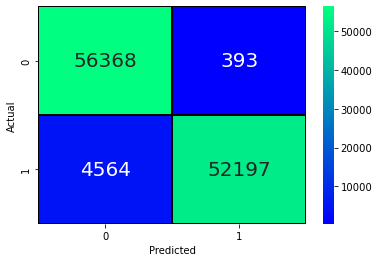

In [24]:
# Evaluating performance of the initial trained model by predicting the target variable and creating the confusion matrix

predictions = rf.predict(X_test)
print("Test Accuracy Random Forest :",accuracy_score(y_test, predictions)*100)

train_predictions =rf.predict(X_train)
print("Train Accuracy Random Forest :",accuracy_score(y_train, train_predictions)*100)

print("Classification Report :\n",classification_report(y_test, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Random Forest:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Random Forest:', (TP)/(TP + FN)*100)


Random Forest ROC AUC Score : 95.63344549955075


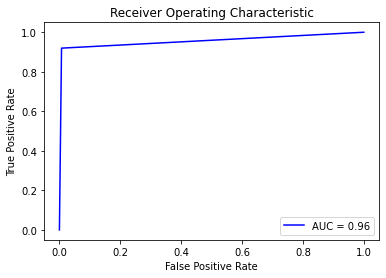

In [27]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Random Forest ROC AUC Score :",roc_auc*100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The initial Random Forest model after training has a testing accuracy of 95.63% , a model precision of 0.99 for class 1, and a sensitivity of 91.96%. The ROC AUC score for this model is 95.63. 
# There were 393 false positives  and 4,564 false negatives.

# The initial Random Forest Model outperforms the previous Logistic Regression Models in terms of accuracy, precision, and sensitivity. The ROC score for the optimized Random Forest Model is 18.17 higher than the initial Logistic Regression model and 18.14 higher than the optimized Logist Regression Model.

# The next step is to conduct a grid search to find the optimum combination of model parameters to maximize the precision of this model.

In [36]:
# Grid Search to find optimum model parameters

param_grid = {
    'bootstrap': ['True', 'False'],
    'ccp_alpha': [0, 1, 10, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
}

# Create the GridSearchCV object
grid = GridSearchCV(rf, param_grid, scoring = 'precision', n_jobs = -1, verbose = 1)

# Fit the grid search to your data
grid.fit(X_train, y_train)

# Print the best parameters after tuning
print("Best Parameters:", grid.best_params_)

# Use the best estimator to make predictions
grid_predictions = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': 'True', 'ccp_alpha': 0, 'max_features': 'auto'}
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     56761
         1.0       0.99      0.92      0.95     56761

    accuracy                           0.96    113522
   macro avg       0.96      0.96      0.96    113522
weighted avg       0.96      0.96      0.96    113522



In [ ]:
# After completion of the grid search, the optimum parameters for the model were found. 
# These parameters are then used to created an optimized Random Forest model, which is then fit using the training data.

In [37]:
# Building and training an optimized Random Forest Model using the optimum parameters determined from the grid search

rf_best = RandomForestClassifier(random_state = 42, bootstrap = True, ccp_alpha = 0, max_features = 'auto')
rf_best.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, random_state=42)

Test Accuracy Random Forest : 95.63344549955075
Train Accuracy Random Forest : 99.99691687000643
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     56761
         1.0       0.99      0.92      0.95     56761

    accuracy                           0.96    113522
   macro avg       0.96      0.96      0.96    113522
weighted avg       0.96      0.96      0.96    113522

Testing Accuracy for Random Forest: 95.63344549955075
Testing Sensitivity for Random Forest: 91.95926780712108


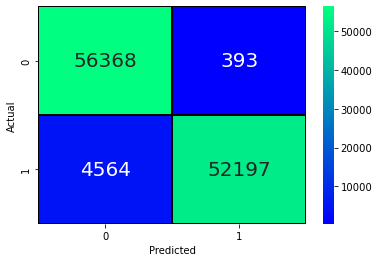

In [38]:
# Evaluating performance of the optimized trained model by predicting the target variable and creating the confusion matrix 

predictions = rf_best.predict(X_test)
print("Test Accuracy Random Forest :",accuracy_score(y_test, predictions)*100)

train_predictions =rf_best.predict(X_train)
print("Train Accuracy Random Forest :",accuracy_score(y_train,train_predictions)*100)

print("Classification Report :\n",classification_report(y_test,predictions))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Random Forest:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Random Forest:', (TP)/(TP + FN)*100)

Random Forest ROC AUC Score : 95.63344549955075


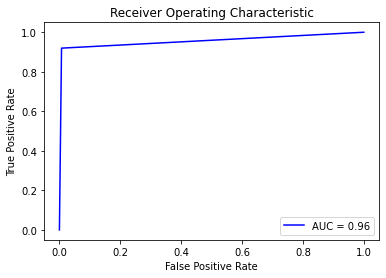

In [39]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Random Forest ROC AUC Score :",roc_auc*100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The new Random Forest model after training has a testing accuracy of 95.63% (no change), a model precision of 0.99 for class 1 (no change), and a sensitivity of 91.96% (no change). The ROC AUC score for this model is 95.63 (no change). 
# There were 393 false positives and 4,564 false negatives.

# There is no change in model performance using the parameters found during the grid search.

# The next step is to build an initial SVM:C model and fit using the training data.

## Support Vector Machine: Classifier

In [ ]:
# Importing the SVC library

from sklearn.svm import SVC

In [ ]:
# Building/Training the initial Support Vector Machine Classifier Model

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)

SVC(random_state=42)

Test Accuracy SVM : 91.69324007681331
Train Accuracy SVM : 91.76275755146625
Classification Report :
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     56761
         1.0       0.98      0.85      0.91     56761

    accuracy                           0.92    113522
   macro avg       0.92      0.92      0.92    113522
weighted avg       0.92      0.92      0.92    113522

Testing Accuracy for SVM: 0.9169324007681331
Testing Sensitivity for SVM: 0.8480646923063371


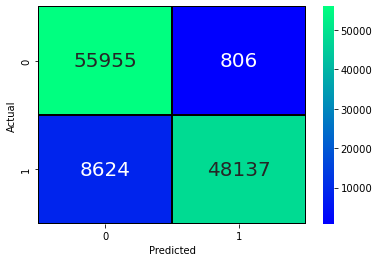

In [83]:
# Evaluating performance of the initial trained model by predicting the target variable and creating the confusion matrix 

predictions = svc.predict(X_test)
print("Test Accuracy SVM :",accuracy_score(y_test, predictions)*100)

train_predictions = svc.predict(X_train)
print("Train Accuracy SVM :",accuracy_score(y_train, train_predictions)*100)

print("Classification Report :\n",classification_report(y_test, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for SVM:', (TP + TN)/ (TP + TN + FN + FP))
print('Testing Sensitivity for SVM:', (TP)/(TP + FN))

SVM:C ROC AUC Score : 91.6932400768133


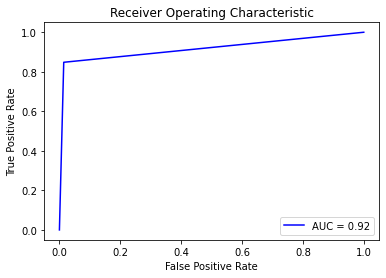

In [84]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("SVM:C ROC AUC Score :",roc_auc*100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The initial SVM:C model after training has a testing accuracy of 91.69%, a model precision of 0.98 for class 1, and a sensitivity of 84.81%. The ROC AUC score for this model is 91.69. 
# There were 806 false positives and 8,624 false negatives.

# The initial SVM:C model outperforms the previous Logistic Regression models in terms of accuracy, precision, and sensitivity. The ROC score for the SVM:C model is 14.23 higher than the initial and 14.20 higher than the optimized Logist Regression Models.
# The initial SVM:C model is slightly outperformed by the previous Random Forest models in terms of accuracy, precision, and sensitivity. The ROC score for the SVM:C model is 3.94 lower than the initial/optimized Random Forest Models.

# The next step is to conduct a grid search to find the optimum combination of model parameters to maximize the precision of this model.

In [ ]:
# Grid Search to find optimum model parameters

param_grid = {
    'C': [ 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    
        

}

# Create the GridSearchCV object
grid = GridSearchCV(svc, param_grid, scoring = 'precision', n_jobs = -1, verbose = 1, cv = 2)

# Fit the grid search to your data
grid.fit(X_train, y_train)

# Print the best parameters after tuning
print("Best Parameters:", grid.best_params_)

# Use the best estimator to make predictions
grid_predictions = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, grid_predictions))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best Parameters: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     56761
         1.0       0.99      0.86      0.92     56761

    accuracy                           0.93    113522
   macro avg       0.93      0.93      0.93    113522
weighted avg       0.93      0.93      0.93    113522



In [ ]:
# After completion of the grid search, the optimum parameters for the model were found. 
# These parameters are then used to created an optimized SVM:C model, which is then fit using the training data.

In [ ]:
# Building and training an optimized Support Vector Machine Classifier Model using the optimum parameters determined from the grid search

svc_best = SVC(random_state = 42, C = 10, kernel = 'rbf')
svc_best.fit(X_train, y_train)

SVC(C=10, random_state=42)

Test Accuracy SVM : 92.73532883493948
Train Accuracy SVM : 92.7878982743281
Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     56761
         1.0       0.99      0.86      0.92     56761

    accuracy                           0.93    113522
   macro avg       0.93      0.93      0.93    113522
weighted avg       0.93      0.93      0.93    113522

Testing Accuracy for SVM: 0.9273532883493948
Testing Sensitivity for SVM: 0.8645372703088389


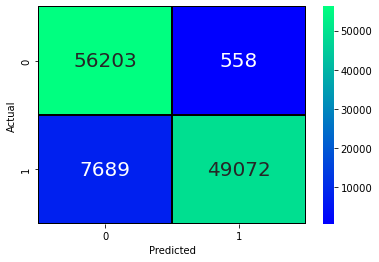

In [89]:
# Evaluating performance of the optimized trained model by predicting the target variable and creating the confusion matrix 

predictions = svc_best.predict(X_test)
print("Test Accuracy SVM :",accuracy_score(y_test, predictions)*100)

train_predictions = svc_best.predict(X_train)
print("Train Accuracy SVM :",accuracy_score(y_train, train_predictions)*100)

print("Classification Report :\n",classification_report(y_test, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for SVM:', (TP + TN)/ (TP + TN + FN + FP))
print('Testing Sensitivity for SVM:', (TP)/(TP + FN))

SVM:C ROC AUC Score : 92.73532883493948


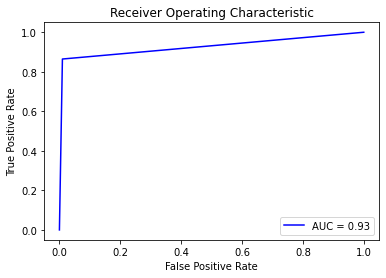

In [90]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("SVM:C ROC AUC Score :",roc_auc*100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The optimized SVM:C model after training has a testing accuracy of 92.74% (1.05% increase), a model precision of 0.99 for class 1 (0.01 increase), and a sensitivity of 86.45% (1.64% increase). The ROC AUC score for this model is 92.74 (1.05 increase). 
# There were 558 false positives (248 decrease) and 7,689 false negatives (935 decrease).

# The optimized SVM:C model outperforms the previous Logistic Regression models in terms of accuracy, precision, and sensitivity. The ROC score for the optimized SVM:C model is 15.28 higher than the initial model and 15.25 higher than the optimized Logistic Regression Models.
# The optimized SVM:C model is outperformed by the previous Random Forest models in terms of accuracy and sensitivity. The ROC score for the SVM:C model is 2.89 lower than the initial/optimized Random Forest Models.

# The optimized model, built with the parameters obtained from the grid search, has a slightly better performance than the initial model.

# The next step is to use the original dataset before oversampling to determine the performance of the models on the original dataset.

## Modeling Outcome

In [ ]:
# Of the models built and tested, the model with the highest performance overall was the Random Forest Model, Followed by the optimized SVM:C Models. The Logistic Regression models had the worst performance, which was expected due to the complexity of the other models.

# Model Evaluation: Original Dataset

In [132]:
# Redefine X and y

eval_y = df['Heart_Disease']
eval_X = df.drop(['Heart_Disease'], axis = 1)

In [133]:
# Rescale the data

eval_scale = MinMaxScaler()
eval_X_scaled = scale.fit_transform(eval_X)
print(eval_X_scaled.shape)
print(eval_y.shape)

(308774, 18)
(308774,)


## Logistic Regression Evaluation

### Initial Logistic Regression Model

Test Accuracy Logistic Regression : 74.3563253382733
Classification Report :
               precision    recall  f1-score   support

         0.0       0.97      0.74      0.84    283803
         1.0       0.21      0.78      0.33     24971

    accuracy                           0.74    308774
   macro avg       0.59      0.76      0.59    308774
weighted avg       0.91      0.74      0.80    308774

Testing Accuracy for Logistic Regression: 74.3563253382733
Testing Sensitivity for Logistic Regression: 77.87433422770414


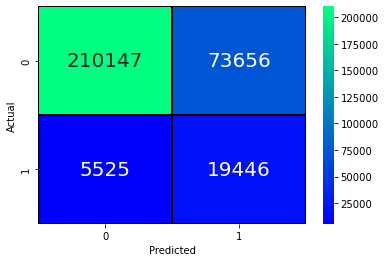

In [134]:
# Evaluating performance of the initial trained LR model on the original dataset by predicting the target variable and creating the confusion matrix 

predictions = lr.predict(eval_X_scaled)
print("Test Accuracy Logistic Regression :",accuracy_score(eval_y, predictions)*100)

print("Classification Report :\n",classification_report(eval_y, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(eval_y, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Logistic Regression:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Logistic Regression:', (TP)/(TP + FN)*100)

Logistic Regression ROC AUC Score : 75.9605601012412


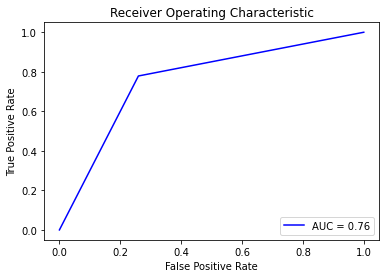

In [136]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(eval_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Logistic Regression ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The initial Logistic Regression model has a testing accuracy of 74.36%, a model precision of 0.21 for class 1, and a sensitivity of 77.87%. The ROC AUC score for this model was 75.96. 
# There were 73,656 false positives (predicted to be 1 while actually 0) and 5,525 false negatives (predicted to be 0 while actually one).

# The Logistic Regression Model struggles with a high amount of false positives, which could potentially be remedied by increasing the threshold for a positive class assignment.

### Optimized Logistic Regression Model

Test Accuracy Logistic Regression : 73.57679079197082
Classification Report :
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84    283803
         1.0       0.21      0.79      0.33     24971

    accuracy                           0.74    308774
   macro avg       0.59      0.76      0.58    308774
weighted avg       0.91      0.74      0.79    308774

Testing Accuracy for Logistic Regression: 73.57679079197082
Testing Sensitivity for Logistic Regression: 79.02767209963558


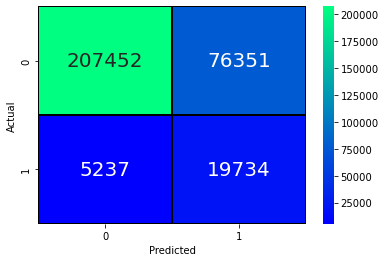

In [148]:
# Evaluating performance of the optimized trained LR model on the original dataset by predicting the target variable and creating the confusion matrix 

predictions = lr_best.predict(eval_X_scaled)
print("Test Accuracy Logistic Regression :",accuracy_score(eval_y, predictions)*100)

print("Classification Report :\n",classification_report(eval_y, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(eval_y, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Logistic Regression:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Logistic Regression:', (TP)/(TP + FN)*100)

Logistic Regression ROC AUC Score : 76.06242785469655


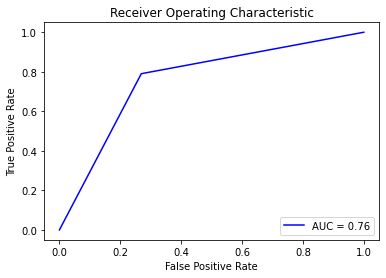

In [149]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(eval_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Logistic Regression ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The optimized Logistic Regression model has a testing accuracy of 73.58% (0.77% decrease), a model precision of 0.21 for class 1 (no change), and a sensitivity of 79.03% (1.16% increase). The ROC AUC score for this model was 76.06 (0.10 increase). 
# There were 76,351 false positives (2,695 increase) and 5,237 false negatives (288 decrease).

#The Logistic Regression Model struggles with a high amount of false positives, which could potentially be remedied by increasing the threshold for a positive class assignment.

## Random Forest Model Evaluation

### Initial Random Forest Model

Test Accuracy Random Forest : 98.40660159210296
Classification Report :
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    283803
         1.0       0.98      0.82      0.89     24971

    accuracy                           0.98    308774
   macro avg       0.98      0.91      0.94    308774
weighted avg       0.98      0.98      0.98    308774

Testing Accuracy for Random Forest: 98.40660159210296
Testing Sensitivity for Random Forest: 81.87097032557767


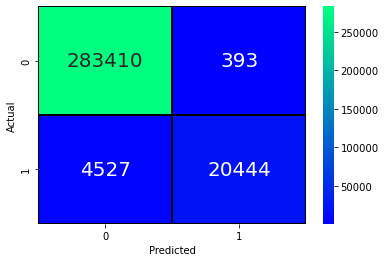

In [139]:
# Evaluating performance of the initial trained RF model on the original dataset by predicting the target variable and creating the confusion matrix 

predictions = rf.predict(eval_X_scaled)
print("Test Accuracy Random Forest :",accuracy_score(eval_y, predictions)*100)

print("Classification Report :\n",classification_report(eval_y, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(eval_y, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Random Forest:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Random Forest:', (TP)/(TP + FN)*100)

Random Forest ROC AUC Score : 90.86624699405913


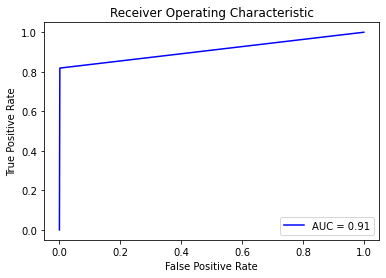

In [141]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(eval_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Random Forest ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The initial Random Forest model has a testing accuracy of 98.41%, a model precision of 0.98 for class 1, and a sensitivity of 81.87%. The ROC AUC score for this model was 90.87. 
# There were 393 false positives and 4,527 false negatives.

# The Random Forest Model appears to have captured the data pattern very well. The amount of false negatives could potentially be remedied by decreasing the threshold for a positive class assignment, at the risk of increased false positives.

### Optimized Random Forest Model

Test Accuracy Random Forest : 98.40660159210296
Classification Report :
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    283803
         1.0       0.98      0.82      0.89     24971

    accuracy                           0.98    308774
   macro avg       0.98      0.91      0.94    308774
weighted avg       0.98      0.98      0.98    308774

Testing Accuracy for Random Forest: 98.40660159210296
Testing Sensitivity for Random Forest: 81.87097032557767


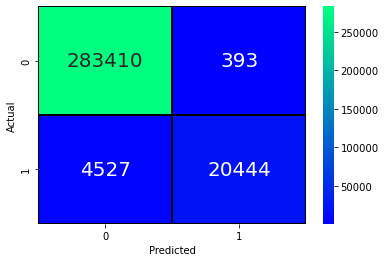

In [142]:
# Evaluating performance of the optimized trained RF model on the original dataset by predicting the target variable and creating the confusion matrix 

predictions = rf_best.predict(eval_X_scaled)
print("Test Accuracy Random Forest :",accuracy_score(eval_y, predictions)*100)

print("Classification Report :\n",classification_report(eval_y, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(eval_y, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for Random Forest:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for Random Forest:', (TP)/(TP + FN)*100)

Random Forest ROC AUC Score : 90.86624699405913


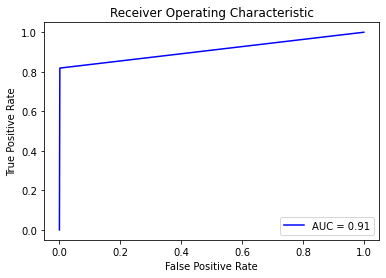

In [143]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(eval_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Random Forest ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The optimized Random Forest model has a testing accuracy of 98.41%, a model precision of 0.98 for class 1, and a sensitivity of 81.87%. The ROC AUC score for this model was 90.87. 
# There were 393 false positives and 4,527 false negatives.
# There is no difference between the initial and optimized Random Forest Models.

# The Random Forest Model appears to have captured the data pattern very well. The amount of false negatives could potentially be remedied by decreasing the threshold for a positive class assignment, at the risk of increased false positives.

## Support Vector Machine: Classifier Evaluation

### Initial SVM:C Model

Test Accuracy SVM: 91.60162448910853
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    283803
         1.0       0.43      0.11      0.18     24971

    accuracy                           0.92    308774
   macro avg       0.68      0.55      0.57    308774
weighted avg       0.89      0.92      0.89    308774

Testing Accuracy for SVM: 91.60162448910853
Testing Sensitivity for SVM: 11.164951343558528


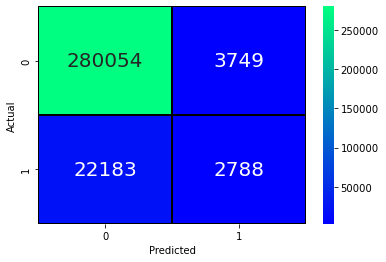

In [144]:
# Evaluating performance of the initial trained SVC model on the original dataset by predicting the target variable and creating the confusion matrix 

predictions = svc.predict(eval_X_scaled)
print("Test Accuracy SVM:",accuracy_score(eval_y, predictions)*100)

print("Classification Report :\n",classification_report(eval_y, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(eval_y, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for SVM:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for SVM:', (TP)/(TP + FN)*100)

SVM ROC AUC Score : 54.92198230137796


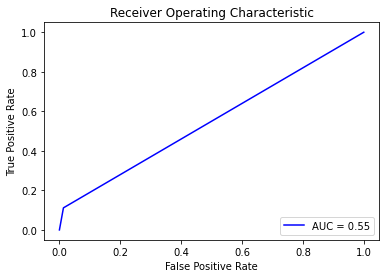

In [145]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(eval_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("SVM ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The initial SVM:C model has a testing accuracy of 91.60%, a model precision of 0.43 for class 1, and a sensitivity of 11.16%. The ROC AUC score for this model was 54.92. 
# There were 3,749 false positives and 22,183 false negatives.

# The SVM:C model struggled to capture the data pattern very well. The amount of false negatives could potentially be remedied by decreasing the threshold for a positive class assignment, at the risk of increased false positives.

### Optimized SVM:C Model

Test Accuracy SVM: 91.81861167067176
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    283803
         1.0       0.47      0.09      0.15     24971

    accuracy                           0.92    308774
   macro avg       0.70      0.54      0.55    308774
weighted avg       0.89      0.92      0.89    308774

Testing Accuracy for SVM: 91.81861167067176
Testing Sensitivity for SVM: 8.866284890472949


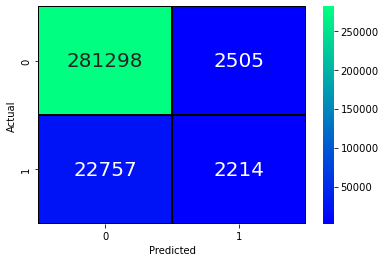

In [146]:
# Evaluating performance of the optimized trained SVC model on the original dataset by predicting the target variable and creating the confusion matrix 

predictions = svc_best.predict(eval_X_scaled)
print("Test Accuracy SVM:",accuracy_score(eval_y, predictions)*100)

print("Classification Report :\n",classification_report(eval_y, predictions))

# Making the Confusion Matrix
cm = confusion_matrix(eval_y, predictions)

sns.heatmap(cm, annot = True, cmap = 'winter', linewidths = 0.3,
            linecolor = 'black', annot_kws = {"size":20}, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TN = cm[0][0]   # Data that was predicted to be class 0 and is actually class 0
TP = cm[1][1]   # Data that was predicted to be class 1 and is actually class 1
FN = cm[1][0]   # Data that was predicted to be class 0 but is actually class 1
FP = cm[0][1]   # Data that was predicted to be class 1 but is actually class 0

print('Testing Accuracy for SVM:', (TP + TN)/ (TP + TN + FN + FP)*100)
print('Testing Sensitivity for SVM:', (TP)/(TP + FN)*100)

Logistic Regression ROC AUC Score : 53.99181518653941


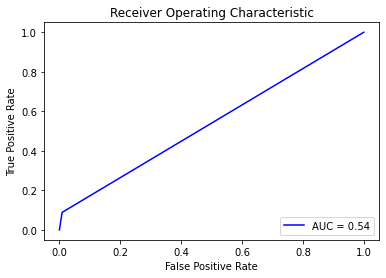

In [147]:
# Calculating the ROC AUC Score and creating the ROC Curve

fpr, tpr, threshold = metrics.roc_curve(eval_y, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Logistic Regression ROC AUC Score :",roc_auc * 100)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# The optimized SVM:C model has a testing accuracy of 91.82% (0.22% increase), a model precision of 0.47 for class 1 (0.04 increase), and a sensitivity of 8.87% (2.29% decrease). The ROC AUC score for this model was 53.99 (0.93 decrease). 
# There were 2505 false positives (1,244 decrease) and 22,757 false negatives (574 increase).

# The SVM:C model struggled to capture the data pattern very well. The amount of false negatives could potentially be remedied by decreasing the threshold for a positive class assignment, at the risk of increased false positives.
# The original SVM:C model performed better with the original dataset than the optimized version.

# Summary of Findings

## Logistic Regression

In [ ]:
# The initial Logistic Regression model, fitted on the oversampled training dataset, had the following results:
# Test Accuracy: 77.46%
# Test Class 1 Precision: 0.76
# Test Sensitivity: 80.78%
# Test ROC AUC: 77.46
# False Positives / False Negatives: 14,676 / 10,911


# The optimized Logistic Regression model, after training on the oversampled dataset, had the following results:
# Test Accuracy: 77.49% (0.03% increase from initial model)
# Test Class 1 Precision: 0.75 (0.01 decrease from initial model)
# Test Sensitivity: 81.81% (1.03% increase from initial model)
# Test ROC AUC: 77.49 (0.03 increase from initial model)
# False Positives / False Negatives: 15,231 (555 decrease from initial model) / 10,324 (587 decrease from initial model)


# The initial Logistic Regression model, evaluated on the original dataset, had the following results:
# Test Accuracy: 74.36%
# Test Class 1 Precision: 0.21
# Test Sensitivity: 77.87%
# Test ROC AUC: 75.96
# False Positives / False Negatives: 73,656 / 5,525


# The optimized Logistic Regression model, evaluated on the original dataset, had the following results:
# Test Accuracy: 73.58% (0.78% decrease from initial model)
# Test Class 1 Precision: 0.21 (same as initial model)
# Test Sensitivity: 79.03% (1.16% increase from initial model)
# Test ROC AUC: 76.06 (0.10 increase from initial model)
# False Positives / False Negatives: 76,351 (2,695 increase from initial model) / 5,237 (288 decrease from initial model)


# Metric change from oversampled data initial model to original dataset initial model:
# Test Accuracy Difference: 3.10% decrease
# Test Class 1 Precision Difference: 0.55 decrease
# Test Sensitivity Difference: 2.91% decrease
# Test ROC AUC Difference: 1.50 decrease


# Comparison of oversampled data optimized model and original dataset optimized model:
# Test Accuracy Difference: 3.91% decrease
# Test Class 1 Precision Difference: 0.54 decrease
# Test Sensitivity Difference: 2.78% decrease
# Test ROC AUC Difference: 1.43 decrease

## Random Forest

In [ ]:
# The initial Random Forest model, fitted on the oversampled training dataset, had the following results:
# Test Accuracy: 95.63%
# Test Class 1 Precision: 0.99
# Test Sensitivity: 91.96%
# Test ROC AUC: 95.63
# False Positives / False Negatives: 393 / 4,564


# The optimized Random Forest model, after training on the oversampled dataset, had the following results:
# Test Accuracy: 95.63% (no change from initial model)
# Test Class 1 Precision: 0.99 (no change from initial model)
# Test Sensitivity: 91.96% (no change from initial model)
# Test ROC AUC: 95.63 (no change from initial model)
# False Positives / False Negatives: 393 (no change from initial model) / 4,564 (no change from initial model)


# The initial Random Forest model, evaluated on the original dataset, had the following results:
# Test Accuracy: 98.41%
# Test Class 1 Precision: 0.98
# Test Sensitivity: 81.87%
# Test ROC AUC: 90.87
# False Positives / False Negatives: 393 / 4,527


# The optimized Random Forest model, evaluated on the original dataset, had the following results:
# Test Accuracy: 98.41% (no change from initial model)
# Test Class 1 Precision: 0.98 (no change as initial model)
# Test Sensitivity: 81.87% (no change from initial model)
# Test ROC AUC: 90.87 (no change from initial model)
# False Positives / False Negatives: 393 (no change from initial model) / 4,527 (no change from initial model)


# Metric change from oversampled data initial model to original dataset initial model:
# Test Accuracy Difference: 2.78% increase
# Test Class 1 Precision Difference: 0.01 decrease
# Test Sensitivity Difference: 10.09% decrease
# Test ROC AUC Difference: 4.76 decrease


# Comparison of oversampled data optimized model and original dataset optimized model:
# Test Accuracy Difference: 2.78% increase
# Test Class 1 Precision Difference: 0.01 decrease
# Test Sensitivity Difference: 10.09% decrease
# Test ROC AUC Difference: 4.76 decrease

## Support Vector Machine: Classifier

In [ ]:
# The initial SVM:C model, fitted on the oversampled training dataset, had the following results:
# Test Accuracy: 91.69%
# Test Class 1 Precision: 0.98 
# Test Sensitivity: 84.81%
# Test ROC AUC: 91.69
# False Positives / False Negatives: 806 / 8,624


# The optimized SVM:C model, after training on the oversampled dataset, had the following results:
# Test Accuracy: 92.74% (1.05% increase from initial model)
# Test Class 1 Precision: 0.99 (0.01 increase from initial model)
# Test Sensitivity: 86.45% (1.64% increase from initial model)
# Test ROC AUC: 92.74 (1.05 increase from initial model)
# False Positives / False Negatives: 558 (248 decrease from initial model) / 7,689 (935 decrease from initial model)


# The initial SVM:C model, evaluated on the original dataset, had the following results:
# Test Accuracy: 91.60%
# Test Class 1 Precision: 0.43
# Test Sensitivity: 11.16%
# Test ROC AUC: 54.92
# False Positives / False Negatives: 3,749 / 22,183


# The optimized SVM:C model, evaluated on the original dataset, had the following results:
# Test Accuracy: 91.82% (0.22% increase from initial model)
# Test Class 1 Precision: 0.47 (0.04 increase from initial model) 
# Test Sensitivity: 8.87% (2.29% decrease from initial model)
# Test ROC AUC: 53.99 (0.93 decrease from initial model)
# False Positives / False Negatives: 2505 (1,244 decrease from initial model) / 22,757 (574 increase from initial model)


# Metric change from oversampled data initial model to original dataset initial model:
# Test Accuracy Difference: 0.09% decrease 
# Test Class 1 Precision Difference: 0.55 decrease
# Test Sensitivity Difference: 73.65% decrease
# Test ROC AUC Difference: 36.77 decrease


# Comparison of oversampled data optimized model and original dataset optimized model:
# Test Accuracy Difference: 0.92% decrease
# Test Class 1 Precision Difference: 0.52 decrease
# Test Sensitivity Difference: 77.58% decrease
# Test ROC AUC Difference: 38.75 decrease

# Results & Recommendations

In [ ]:
# The model with the highest performance was the Random Forest for both the oversampled and original datasets. 
# The Logistic Regression model performance on the oversampled dataset was weaker than the other models but had a higher sensitivity than the SVM:C model on the original dataset.
# The optimized Logistic Regression model had better performance than the initial model on the oversampled dataset, while the initial model had better performance than the optimized model on the original dataset.
# The Random Forest model had a minimal decrease in performance when comparing the oversampled dataset and original dataset.
# Both initial and optimized Random Forest models had the same performance.
# The SVM:C model performed well on the oversampled dataset, but performance was drastically worse when trying the predict on the original dataset.
# The optimized SVM:C model had better performance than the initial model on the oversampled dataset, while the initial model had better performance than the optimized model on the original dataset.

# The model performance ranking on the oversampled dataset:
# 1) Random Forest Models
# 2) SVM:C Models
# 3) Logistic Regression Models

# The model performance ranking on the original dataset:
# 1) Random Forest Models
# 2) Logistic Regression Models
# 3) SVM:C Models

In [ ]:
# If I had to go back and further improve this model, the things I would do differently would include:
# 1) Reduce variables used in dataset to reduce processing time.
# 2) Attempt to improve SVM:C model performance on the original dataset.
# 3) Explore further models to determine if there is a better fit.
# 4) Explore Principal Component Analysis to determine which variables are significant.